# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data = pandas.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

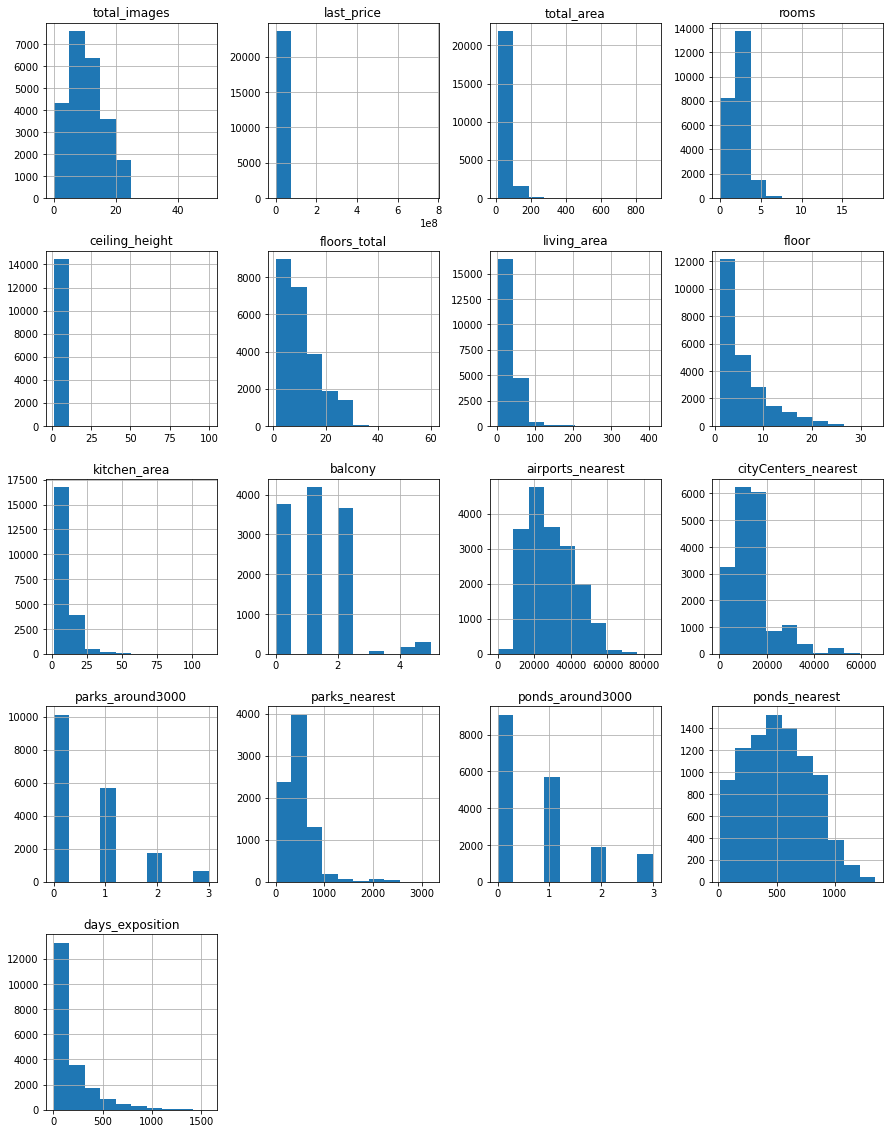

In [5]:
data.hist(figsize=(15, 20))
None

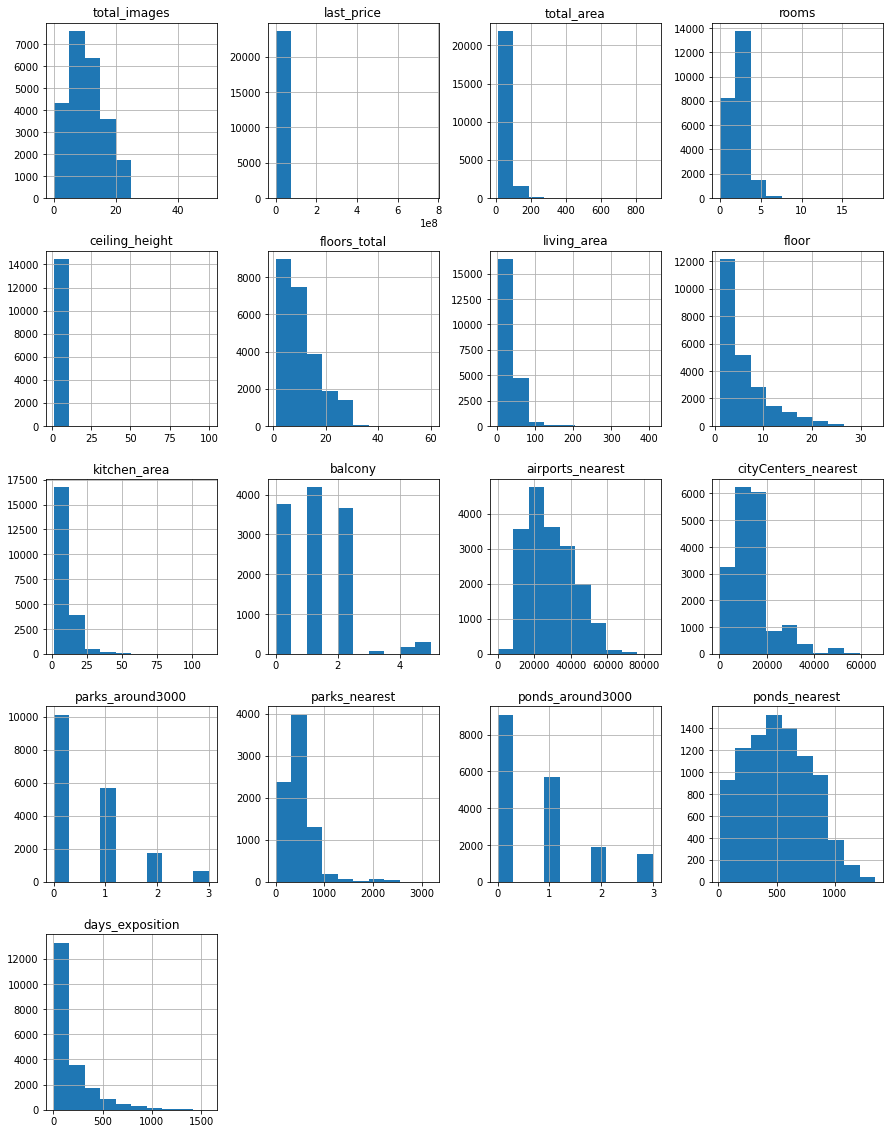

In [6]:

data.hist(figsize=(15, 20))
None

Вывод 1.4  
Проведя первичное изучение данных, можно сказать, что данных более чем достаточно для проведения иследования. Однако в данных хватает ошибок и пропусков, которые необходимо устранить для успешой выполнении работы.

### Предобработка данных

#### Названия столбцов

In [7]:
# были выявлины ошибки в названиях столбцов: заглавные буквы и отсутствие _
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'})

####  Устранение пропусков и замена типа данных

In [8]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype(int)

#заменим значения столбцов где пропуски логично заменить на 0 и изменим тип данных для удобства счета

In [12]:
data['last_price'] = data['last_price'].astype('int')

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

#скорее всего отсутствие значение в столбце is_apartment озночает что объект не является апартаментом

In [14]:
#ceiling_height причина отсутсвия данных непонятно, заменим на среднее значение для домов с таким же количеством этажей. оставшиеся значения заменим на нули.
# такжке изменим тип данных для удобства
for d in data['floors_total'].unique():
    data.loc[(data['floors_total'] == d) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == d), 'ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(0)


In [15]:
#изменим тип в данных в колонке со временем
data['first_day_exposition'] = pandas.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [16]:
#Пропуски в столбцах living_area и kitchen_area непонятны. заменим их на медианные значения для квартир с таким же количеством комнат, а остальные заполняем просто медианным значением
for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == d), 'living_area'].median()

for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == d), 'kitchen_area'].median()

data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [17]:
#заменим пропуски в days_exposition на 0 и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [18]:
#заменим тип даннх в столбце floors_total и удалим лишние значения
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

In [19]:
#удаляем незаполненные поля в столбце locality_name
data = data.dropna(subset=['locality_name'])

In [20]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [21]:
# пропуске в слотбце airports_nearest заполним медианным значением для каждого населенного пункта
for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == d), 'airports_nearest'].median()
    
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [22]:
# пропуске в слотбце city_centers_nearest заполним медианным значением для каждого населенного пункта
for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == d), 'city_centers_nearest'].median()
    
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [23]:
# пропуске в слотбце parks_nearest заполним медианным значением для каждого населенного пункта
for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == d), 'parks_nearest'].median()
    
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [24]:
# пропуске в слотбце ponds_nearest заполним медианным значением для каждого населенного пункта
for d in data['locality_name'].unique():
    data.loc[(data['locality_name'] == d) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == d), 'ponds_nearest'].median()
    
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

#### Устранение неявных дубликатов

In [25]:
len(data['locality_name'].unique())

364

In [26]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа'], 'поселок', regex=True)
) 

In [27]:
data = data.drop_duplicates()

#### Устранение аномалий


In [28]:
#print('lats_price:' data['last_price'].max(), data['last_price'].min())
#data['last_price'].min()

for column_name, column_data in data.iteritems():
    print(column_name, ':', column_data.min(), column_data.max())

total_images : 0 50
last_price : 12190 763000000
total_area : 12.0 900.0
first_day_exposition : 2014-11-27 00:00:00 2019-05-03 00:00:00
rooms : 0 19
ceiling_height : 0.0 100.0
floors_total : 1 60
living_area : 2.0 409.7
floor : 1 33
is_apartment : False True
studio : False True
open_plan : False True
kitchen_area : 1.3 112.0
balcony : 0 5
locality_name : Бокситогорск село Шум
airports_nearest : 0.0 84869.0
city_centers_nearest : 181.0 65968.0
parks_around_3000 : 0 3
parks_nearest : 1.0 3190.0
ponds_around_3000 : 0 3
ponds_nearest : 13.0 1344.0
days_exposition : 0 1580


Обнаружена аномалия в столбце last_price, скорее всего 12190 это значение в тыс.рублей. заменим его в ручную


In [29]:
data.loc[(data['last_price'] == 12190), 'last_price'] = 12190000

Вывод по 1.5  
  
В ходе предобработки данных была проделана работу по удалению пропусков. Там где это возможно пропуски были заполнены либо медианным значениями по группам, либо медианным значения по всему столбцу.  
  
Там где пропуски можно обосновать логически, они были заменены логичными значениями.  
В случае если пропуск заполнить не получается медианными и логическими значениями, вся строка в пропуском подвергалась удалению  
  
Дубликаты в столбце locality_name были приведины к единому виду
  
Эти неточности можно объяснить с одной стороны ошибкой при выгрузки данных, с другой неточность пользователя при заполнении

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра


In [30]:
data['area_price'] = (data['last_price']/data['living_area']).round(2)
data['area_price']

0         254901.96
1         180107.53
2         151486.88
3        1442222.22
4         312500.00
            ...    
23694     132332.88
23695      81578.95
23696      84175.08
23697     376229.51
23698     109756.10
Name: area_price, Length: 23565, dtype: float64

#### День недели, месяц, год

In [31]:
data['day'] = data['first_day_exposition'].dt.weekday
data['day']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day, Length: 23565, dtype: int64

In [32]:
data['week'] = data['first_day_exposition'].dt.month
data['week']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: week, Length: 23565, dtype: int64

In [33]:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23565, dtype: int64

#### Тип этажа

In [34]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

#### Расстояние до центра в км

In [35]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round().astype('int')

### Проведите исследовательский анализ данных

#### графики

##### общая площадь

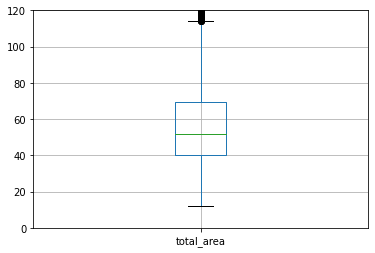

In [36]:
plt.ylim(0, 120)
data.boxplot(column='total_area')
None

In [37]:
# Диаграмма ящик-с-усами показала, что все больше 110 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('total_area <= 110')
print('Выброс равняется:', (data['total_area'].count() - data_blowout['total_area'].count()) / data['total_area'].count())


Выброс равняется: 0.057882452790154894


In [38]:
#Выброс оказался маленьким, удалим его
data = data_blowout

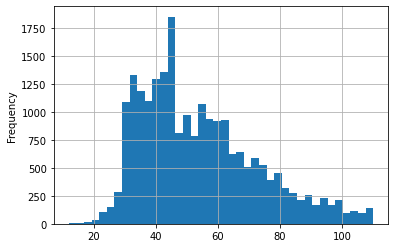

In [39]:
total_area_plot = data['total_area'].plot(kind='hist', bins=40, grid='True') 


Распределение графика похоже на нормальное, что говорит о достоверности графика. Также пиком являются небольшие квартиры в 50-70 квадратных метров, что также является довольно правдоподобным

##### жилая площадь

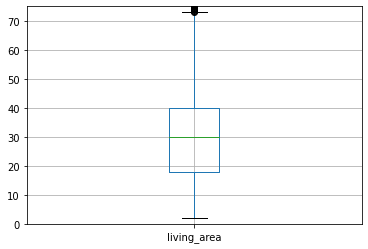

In [40]:
plt.ylim(0, 75)
data.boxplot(column='living_area')
None

In [41]:
# Диаграмма ящик-с-усами показала, что все больше 78 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('living_area <= 75')
print('Выброс равняется:', (data['living_area'].count() - data_blowout['living_area'].count()) / data['living_area'].count())


Выброс равняется: 0.002792666996982118


In [42]:
#Выброс оказался маленьким, удалим его
data = data_blowout

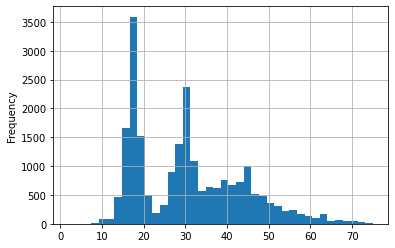

In [43]:
living_area_plot = data['living_area'].plot(kind='hist', bins=40, grid='True') 

График выглядит немного странно, потому что виден странный пик в квартирах с жилой площадью примерно в 20 квадратных метров, однако если не считать этой аномалии распределение выглядит нормальным с пиком в 30-35 квадратных метров. возможно это связано с большим количестовм квартир - студий

##### площадь кухни

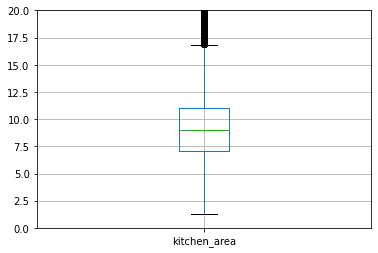

In [44]:
plt.ylim(0, 20)
data.boxplot(column='kitchen_area')
None

In [45]:
# Диаграмма ящик-с-усами показала, что все больше 17 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('kitchen_area <= 17')
print('Выброс равняется:', (data['kitchen_area'].count() - data_blowout['kitchen_area'].count()) / data['kitchen_area'].count())


Выброс равняется: 0.0431365463661412


In [46]:
#Выброс оказался маленьким, удалим его
data = data_blowout

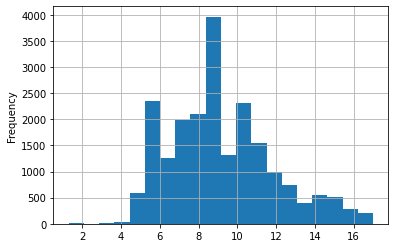

In [47]:
kitchen_area_plot = data['kitchen_area'].plot(kind='hist', bins=20, grid='True') 

График соотвествует нормальному распределению с пиком в районе 10 квадратных метров

##### общая цена

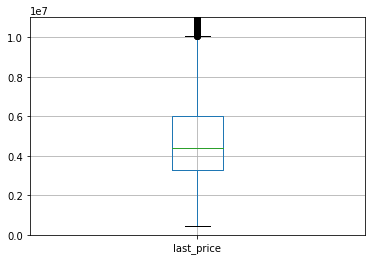

In [48]:
plt.ylim(0, 11000000)
data.boxplot(column='last_price')
None

In [49]:
# Диаграмма ящик-с-усами показала, что все больше 10000000 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('last_price <= 10000000')
print('Выброс равняется:', (data['last_price'].count() - data_blowout['last_price'].count()) / data['last_price'].count())

Выброс равняется: 0.0491880664652568


In [50]:
#Выброс оказался маленьким, удалим его
data = data_blowout

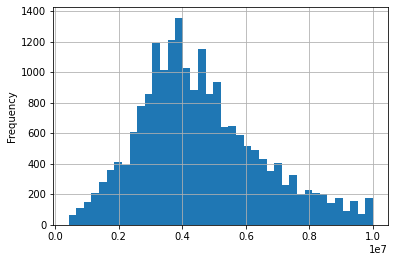

In [51]:
last_price_plot = data['last_price'].plot(kind='hist', bins=40, grid='True')

Распределение похоже на нормальное, значит график можно считать достоверным
    .Как видно из графика больше всего квартир приходится на цена в районе 4млн рублей, что являетсясредним вариантом для квартир в этом городе. Присутсвуют и квартиры дороже 10 млн, но по сравнению с общей выборкой их число крайне мало.
    
    

##### комнаты

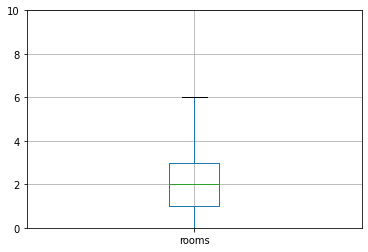

In [52]:
plt.ylim(0, 10)
data.boxplot(column='rooms')
None

Выбросы отсутствуют

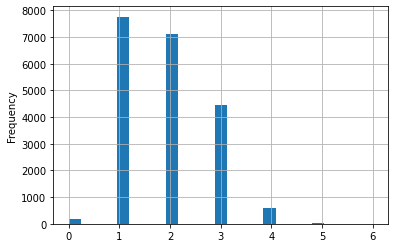

In [53]:
rooms_plot = data['rooms'].plot(kind='hist', bins=25, grid='True')

как видно из графика наибольшее количество квартир приходится на промежуток от 1 до 3 комнат  в квартире, что и правда является средним вариантом

##### высота потолков

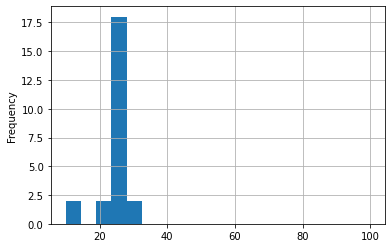

In [54]:
# рассмотрим неадекавтно высокие потолки
ceiling_height_plot = data['ceiling_height'].plot(kind='hist', bins=20, grid='True', range=(10,100))

In [55]:
# возможно ошидка связана с неправильной записью, поэтому разделим значения на 10 чтобы получились адекватные значения
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] = data['ceiling_height']/10


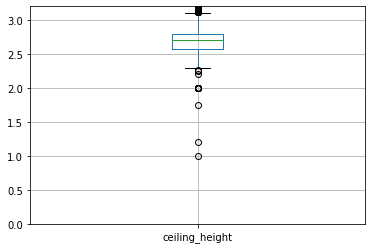

In [56]:
plt.ylim(0, 3.2)
data.boxplot(column='ceiling_height')
None

In [57]:
# Диаграмма ящик-с-усами показала, что все больше 3.1 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('ceiling_height <= 3.1')
print('Выброс равняется:', (data['ceiling_height'].count() - data_blowout['ceiling_height'].count()) / data['ceiling_height'].count())

Выброс равняется: 0.03579584946877172


In [58]:
#Выброс оказался маленьким, удалим его
data = data_blowout

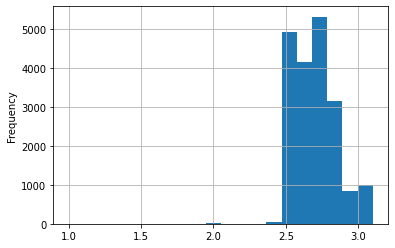

In [59]:
ceiling_height_plot = data['ceiling_height'].plot(kind='hist', bins=20, grid='True')

##### тип этажа

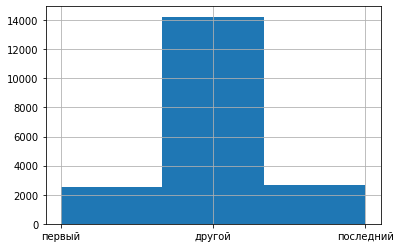

In [60]:
floor_type_plot = data['floor_type'].hist(bins=3)

##### общее количество этажей

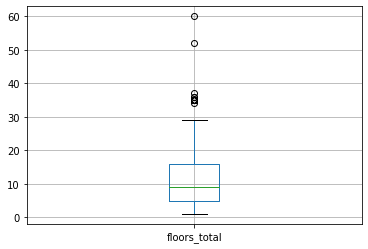

In [61]:
#plt.ylim(0, 3.2)
data.boxplot(column='floors_total')
None

In [62]:
# Диаграмма ящик-с-усами показала, что все больше 30 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('floors_total <= 30')
print('Выброс равняется:', (data['floors_total'].count() - data_blowout['floors_total'].count()) / data['floors_total'].count())

Выброс равняется: 0.0009783224344781423


In [63]:
#Выброс оказался маленьким, удалим его
data = data_blowout

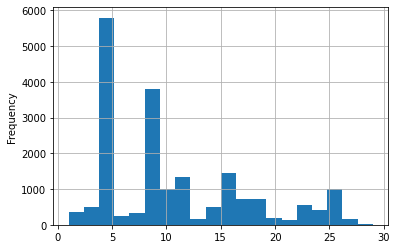

In [64]:
floors_total_type = data['floors_total'].plot(kind='hist', bins=20, grid='True')

##### расстояние до центра

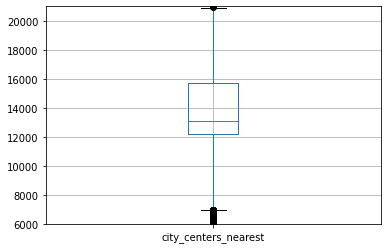

In [65]:
plt.ylim(6000, 21000)
data.boxplot(column='city_centers_nearest')
None

In [66]:
# Диаграмма ящик-с-усами показала, что все больше 21000 и меньше 7000 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('city_centers_nearest <= 21000 and city_centers_nearest >= 7000')
print('Выброс равняется:', (data['floors_total'].count() - data_blowout['floors_total'].count()) / data['floors_total'].count())

Выброс равняется: 0.17998144521183382


Выброс оказался огромным, повысим планку

In [67]:
data_blowout = data.query('city_centers_nearest <= 27000 and city_centers_nearest >= 4000')
print('Выброс равняется:', (data['floors_total'].count() - data_blowout['floors_total'].count()) / data['floors_total'].count())

Выброс равняется: 0.09684568601175136


In [68]:
#Теперь можно удалить выброс
data = data_blowout

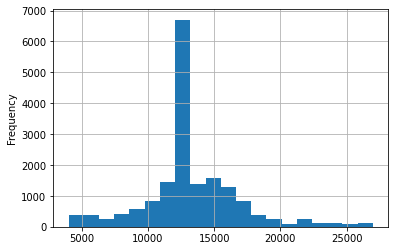

In [69]:
city_centers_nearest_plot = data['city_centers_nearest'].plot(kind='hist', bins=20, grid='True')

##### расстояние до парка

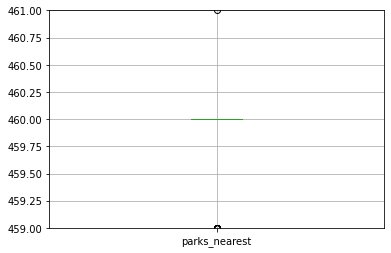

In [70]:
plt.ylim(459, 461)
data.boxplot(column='parks_nearest')
None

In [71]:
# Диаграмма ящик-с-усами показала, что все больше 461 и меньше 459 - следует рассматривать как выброс. Удалим эти значения
data_blowout = data.query('parks_nearest <= 461 and parks_nearest >= 459')
print('Выброс равняется:', (data['floors_total'].count() - data_blowout['floors_total'].count()) / data['floors_total'].count())

Выброс равняется: 0.2933287679050391


Выброс огромный, думаю его не следует трогать в связи со спецификой расположения парков в Санкт-Петербурге и его окрестностях

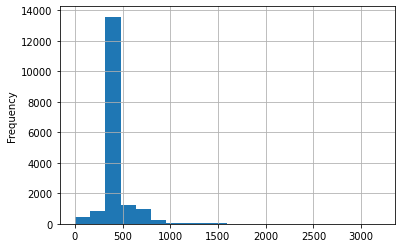

In [72]:
parks_nearest_plot = data['parks_nearest'].plot(kind='hist', bins=20, grid='True')

In [73]:

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 912200.0
Верхняя граница last_price 9600000.0
Процент отброшенных значений =  1.93 %


Вывод по  1.7   
Были изучены данные, обработаны выбросы и построены графики. Также были сделаны промежуточные выводы по каждому графику

#### Скорость продажи квартир

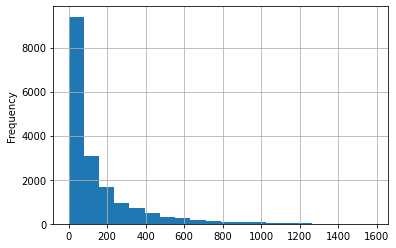

In [74]:
days_exposition_plot = data['days_exposition'].plot(kind='hist', bins=20, grid='True')

In [75]:
data['days_exposition'].describe()

count    17523.000000
mean       145.382240
std        197.543526
min          0.000000
25%         23.000000
50%         67.000000
75%        182.000000
max       1580.000000
Name: days_exposition, dtype: float64

Время продажи квартир доходит до 1580 дней, но такие случаи единичные. В среднем квартира продается за 145 дней. Медианное значение - 67 дня. Можно считать что квартиры которые продаются меньше чем за 23 дня (25%) - продаются быстро, а квартиры которы продаются более чем за 182 дня (75%) - это квартиры которые затянулись с продажей

#### Факторы, влияющие на стоимость квартиры

##### Корреляция

In [76]:
data[['last_price','living_area', 'kitchen_area', 'total_area', 'rooms', 'floor_type', 'year', 'week', 'day']].corr()

,last_price,living_area,kitchen_area,total_area,rooms,year,week,day
last_price,1.000000,0.486112,0.420092,0.631819,0.389830,0.023247,-0.002564,-0.012344
living_area,0.486112,1.000000,0.063846,0.899375,0.911827,-0.026559,-0.004884,-0.004948
kitchen_area,0.420092,0.063846,1.000000,0.340775,-0.059302,-0.035024,0.022030,-0.006854
total_area,0.631819,0.899375,0.340775,1.000000,0.813628,-0.041660,0.002625,-0.008757
rooms,0.389830,0.911827,-0.059302,0.813628,1.000000,-0.016058,-0.008186,-0.000814
year,0.023247,-0.026559,-0.035024,-0.041660,-0.016058,1.000000,-0.269389,0.000995
week,-0.002564,-0.004884,0.022030,0.002625,-0.008186,-0.269389,1.000000,0.006581
day,-0.012344,-0.004948,-0.006854,-0.008757,-0.000814,0.000995,0.006581,1.000000


Видно, что заметная корреляция у цены с общей площадью, а также умеренная с жилой площадью и площадью кухни что звучит правдоподобно. Также прослеживается умеренная корреляция с количеством комнат, оно и понятно, у количества комнат и общей площади сильная корреляция

##### Визуализация

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

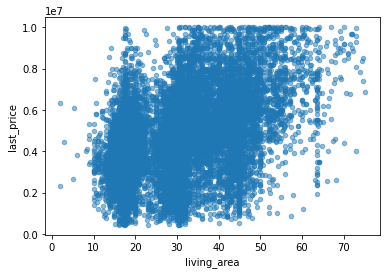

In [77]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5)                 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

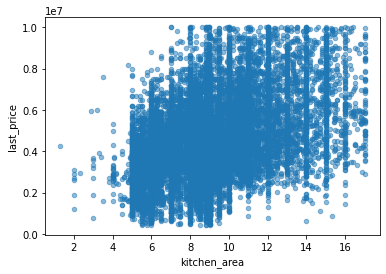

In [78]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5)  

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

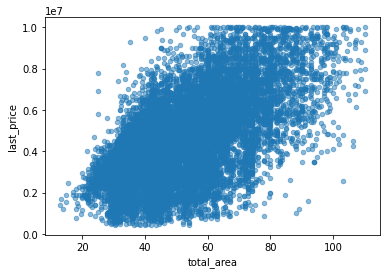

In [79]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5) 

In [80]:
data.groupby(['floor_type'])['last_price']. median().reset_index()

,floor_type,last_price
0,другой,4410000
1,первый,3599500
2,последний,3710000


In [81]:
data.groupby(['floor_type'])['last_price']. mean().reset_index()

,floor_type,last_price
0,другой,4.696153e+06
1,первый,3.791951e+06
2,последний,3.916795e+06


По этим двум таблица видно, что и по медианному, и по среднему значению квартира не на первом этаже стоит дороже квартиры на первом этаже

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

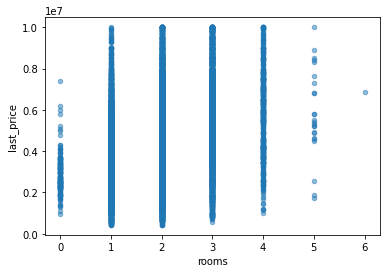

In [82]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5) 

Зависимость от времени объявления слабая и не превышает 0.3 по коэф. Пирсона

      last_price
year            
2014     4725000
2015     4437000
2016     4100000
2017     4100000
2018     4200000
2019     4600000


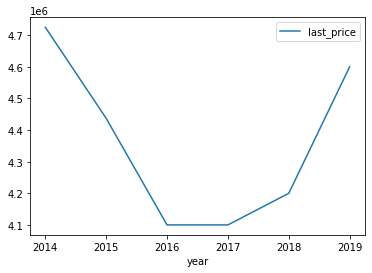

In [83]:
data_hist_year = data.pivot_table(index=['year'], values=['last_price'], aggfunc='median')
print(data_hist_year)
data_hist_year.plot()
None

      last_price
week            
1        4200000
2        4225000
3        4300000
4        4450000
5        4250000
6        4100000
7        4190000
8        4200000
9        4212500
10       4200000
11       4290000
12       4200000


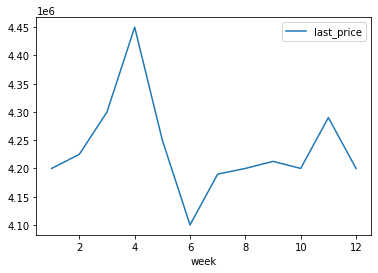

In [84]:
data_hist_week = data.pivot_table(index=['week'], values=['last_price'], aggfunc='median')
print(data_hist_week)
data_hist_week.plot()
None

     last_price
day            
0       4300000
1       4200000
2       4290000
3       4200000
4       4200000
5       4250000
6       4200000


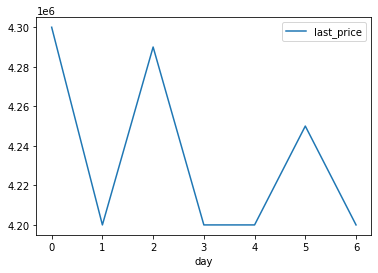

In [85]:
data_hist_day = data.pivot_table(index=['day'], values=['last_price'], aggfunc='median')
print(data_hist_day)
data_hist_day.plot()
None

            last_price
floor_type            
другой         4410000
первый         3599500
последний      3710000


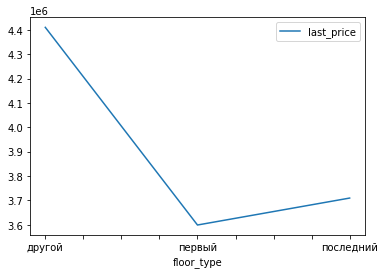

In [86]:
data_hist_floor_type = data.pivot_table(index=['floor_type'], values=['last_price'], aggfunc='median')
print(data_hist_floor_type)
data_hist_floor_type.plot()
None

##### Средняя цена в разных населенных пунктах

In [87]:
data_433_merge = data.pivot_table(index='locality_name', values='area_price',  aggfunc=['count', 'mean'])
data_433_merge.columns = ['count', 'mean']
data_433_merge = data_433_merge.sort_values(by='count', ascending=False).head(10)
data_433_merge


,count,mean
locality_name,,
Санкт-Петербург,11596,193622.154055
поселок Мурино,535,173199.664299
Всеволожск,375,127775.259920
поселок Парголово,314,199555.736306
Гатчина,294,120797.897109
деревня Кудрово,276,183407.291123
поселок Шушары,244,164252.387131
Выборг,204,98028.912647
Кудрово,157,202593.910637


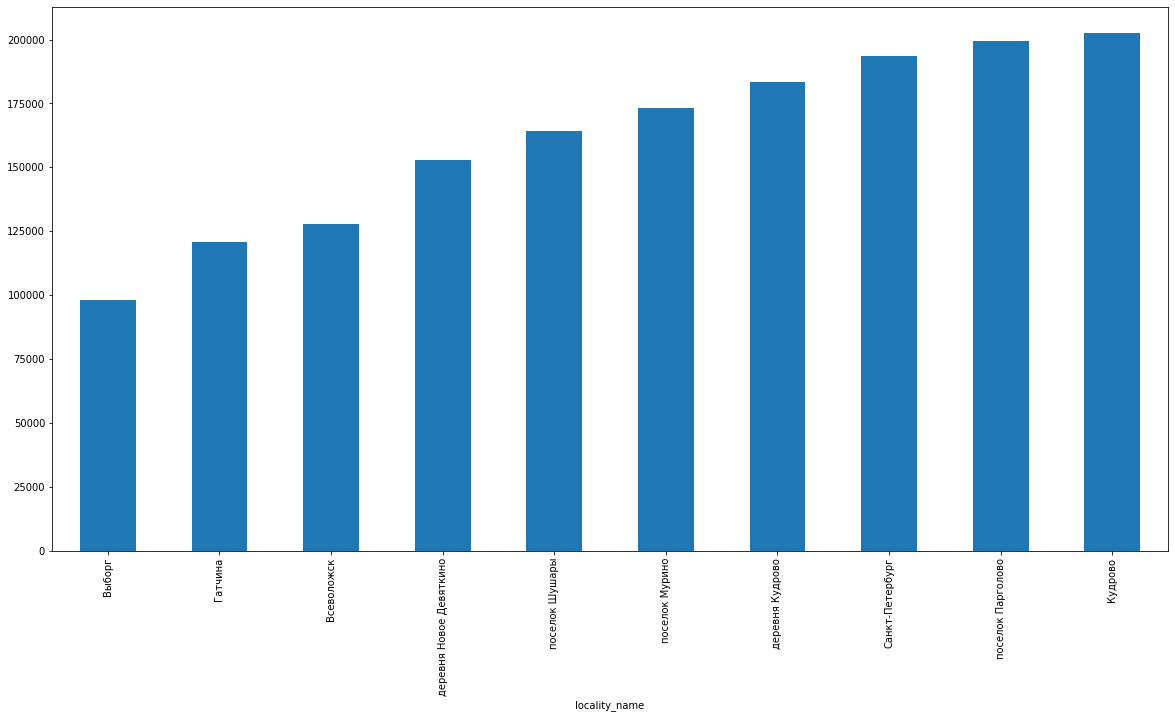

In [88]:
data_433_merge['mean'].sort_values().plot(kind='bar',figsize=(20,10), style='-o')
None

(0.0, 400000.0)

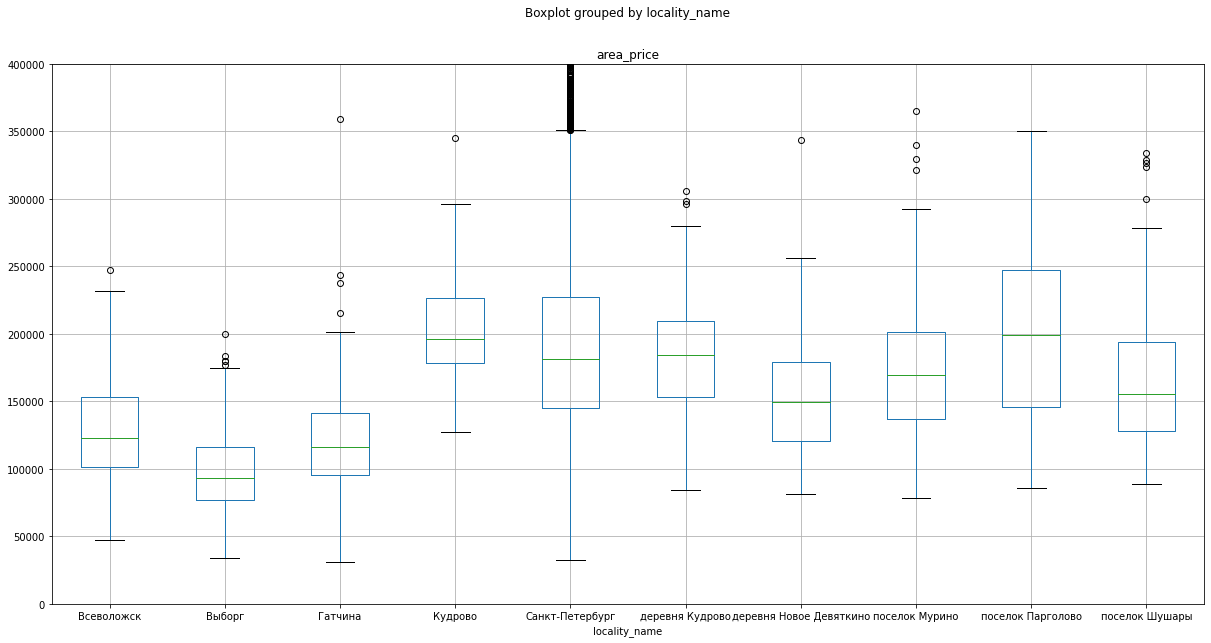

In [88]:

ax = (data
    .query('locality_name in @data_433_merge.index')
    .boxplot('area_price', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 400000)

In [89]:
top_10 = ['Санкт-Петербург', 'поселок Мурино', 'Всеволожск', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'поселок Шушары', 'Выборг', 'Кудрово' , 'деревня Новое Девяткино']
data_top_10 = data.query('locality_name in @top_10')
data_top_10['locality_name'].unique()
#data_top_10 = data_top_10.columns('locality_name', 'area_price')
#data_top_10

array(['поселок Шушары', 'Санкт-Петербург', 'поселок Парголово',
       'поселок Мурино', 'деревня Кудрово', 'Гатчина', 'Выборг',
       'деревня Новое Девяткино', 'Всеволожск', 'Кудрово'], dtype=object)

Самая высокая средняя цена за квадратный метр в Санкт-Петербурге, в то время как самая низкая в Выборге. Думаю и то и другое объясняется спецификой населенного пункта

##### зависимость цены от расстояния до центра Питера

/tmp/ipykernel_100/2130140202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_distance_dependence['city_centers_nearest'] = data_distance_dependence['city_centers_nearest'].round(decimals=-3)/1000


<AxesSubplot:xlabel='city_centers_nearest'>

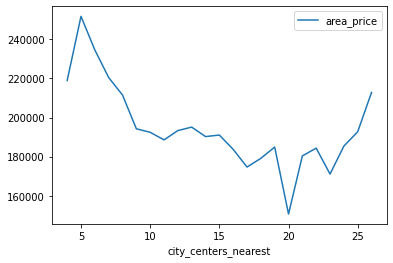

In [90]:
data_distance_dependence = data.query('locality_name == "Санкт-Петербург"')
data_distance_dependence['city_centers_nearest'] = data_distance_dependence['city_centers_nearest'].round(decimals=-3)/1000
data_distance_dependence = data_distance_dependence.pivot_table(index='city_centers_nearest', values='area_price',  aggfunc='mean').sort_values(by='city_centers_nearest')
data_distance_dependence.plot()

В целом видно, что чем ближе в центру, тем квадратный метр дороже, однако есть небольшой пик в области 6 километров, связанный скорее всего с дорогими районами недалеко от центра вроде Петроградской стороны. Наличие второго пика в области 27 километров думаю тоже можно объяснить наличием в том радиусе дорогого района

### Общий вывод

В процессе предварительной обработки данных были выявлены явные и неявные пропуски, ошибки представления значений (значения, не соответствующие действительности). Скорее всего, данные взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников клиентом. Указанные проблемы были устранены.

В ходе предобработки данных была проделана работу по удалению пропусков. Там где это возможно пропуски были заполнены либо медианным значениями по группам, либо медианным значения по всему столбцу.  
Там где пропуски можно обосновать логически, они были заменены логичными значениями.
В случае если пропуск заполнить не получается медианными и логическими значениями, вся строка в пропуском подвергалась удалению
Дубликаты в столбце locality_name были приведины к единому виду

Было изучено с какой скоростью продавались квартиры. В ходе исследования было выяснено, что квартиры которые продаются меньше чем за 23 дня - продаются быстро, а квартиры которы продаются более чем за 182 дня - это квартиры которые затянулись с продажей. В среднем же квартира продается за 145 день.  
  
Было также изучено, какие факторы больше всего влияются на стоимость квартиры. Наибольшая корреляция была прослежена с общей площадью квартиры. Этот вывод довольно очевиден, ведь размер квартиры по ощущениям и должен быть главным фактором ее цены. Также была установлена зависимость от площади кухни, жилой площади и количества комнат. Посколько все эти факторы так или иначе влияют на общую площадь квартиры, их присутсвие в том списке более чем обосновано.

Была посчитана средняя стоимость квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений. Оказалось что самый дорогой квадратный метр в Петербурге, а самый дешевый - Выборге.

Была посчитана стоимость 